# Machine learning Algorithms I
## 6 Clustering Algorithms


<div>
<img src="6_Clustering_figures/Ml_6.png" width="600"/>
</div>

In [1]:
# First, let's import all the needed libraries. 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")


***
### Unsupervised learning


### 6.2. k-Means Clustering


The aim of clustering algorithms is to group data points based on a defined similarity measure (and this is crucial!). Here we will use the clustering algorithm $k$-means. An algorithm that categorises a given (also high-dimensional) data set into $k$ groups (clusters). 

K-means is the go-to unsupervised clustering algorithm that is easy to implement and trains in next to no time. As the model trains by minimizing the sum of distances between data points and their corresponding clusters, it is relatable to other machine learning models.

#### 6.2.1. Introduction

<div>
<img src="6_Clustering_figures/kmeans.png" width="600"/>
</div>

K-means clustering is an unsupervised algorithm that groups unlabelled data into different clusters. The K in its title represents the number of clusters that will be created. This is something that should be known prior to the model training. For example, if K=4 then 4 clusters would be created, and if K=7 then 7 clusters would be created. The k-means algorithm is used in fraud detection, error detection, and confirming existing clusters in the real world.

The algorithm is centroid-based, meaning that each data point is assigned to the cluster with the closest centroid. This algorithm can be used for any number of dimensions as we calculate the distance to centroids using the euclidian distance. The objective of K-Means is to minimize the sum of squared distances between data points and their assigned cluster centroid. This is achieved by iteratively reassigning data points to the closest centroid and moving the centroids to the center of their assigned points, resulting in more compact and separated clusters.

The benefits of the k-means algorithm are that it is easy to implement, it scales to large datasets, it will always converge, and it fits clusters with varying shapes and sizes. Some disadvantages of the model are that the number of clusters is chosen manually, the clusters are dependent on initial values, and that it is sensitive to outliers.

#### 6.2.2. Performing k-Means Clustering

The algorithm works as follows (somewhat simplified):

0. Choose a cluster number $k$ and select $k$ cluster centres (centroids) for initialisation. These centroids can be randomly distributed in the state space or elements can simply be randomly drawn from the training data set to serve as centroids. (Initialisation) 
1. assign each data point to the cluster whose cluster centre (centroid) is closest to this point. ‘Closeness’ is determined by the distance measure, which can be Euclid's distance, for example, which is calculated with the following equation:

$$
d(p,q) =  \sqrt{ \sum_{i=1}^{n}(q_i -p_i)^2}$$

2. recalculate all $k$ cluster centres: The mean value (in all dimensions) of all data points in a cluster results in the new cluster centre (centroid).
3. cancellation criterion fulfilled? (e.g. ‘maximum number of iterations reached’ or ‘cluster centres change only slightly’) Otherwise go to 1.

For the sake of simplicity, we use simulated data in this exercise:



In [2]:
## First, we will import the necessary python packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:

cluster_df = pd.read_csv("data/cluster_sample_data.csv", header=None, sep=" ")
cluster_df.head(3)

,0,1
0,5.209759,4.191962
1,-0.550619,1.731674
2,1.990295,-1.352535


<Axes: xlabel='0', ylabel='1'>

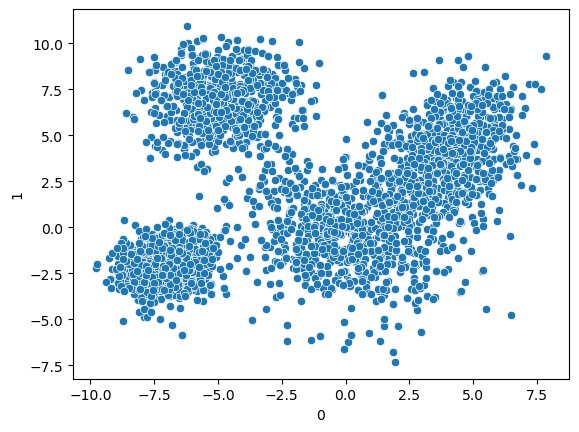

In [4]:

sns.scatterplot(
    data=cluster_df,
    x=0,
    y=1,
)

> **Question**: Even without K-Means clustering, how many clusters would you suggest ?

#### Normalisation
>
> Before applying a clustering algorithm, it's crucial to normalize the data to eliminate any outliers or anomalies.


In [5]:
cluster_df.iloc[:,0].values

array([ 5.20975935, -0.55061918,  1.99029538, ..., -6.58641027,
       -7.71718373, -0.91433376])

In [6]:

from sklearn import preprocessing
#df_norm = cluster_df.copy()

#df_norm[0] = preprocessing.normalize([cluster_df[0]]).flatten()
#df_norm[1] = preprocessing.normalize([cluster_df[1]]).flatten()
#df_norm.head()


#### Determine the number of clusters (K=?)

**Elbow-method**
The optimal value of K in the K-Means algorithm can be found using the Elbow method. This involves finding the inertia value of every K number of clusters from 1-10 and visualizing it.

Inertia: the sum of the squared distances of samples to their closest cluster center.

                 Inertia = Σ(distance(point, centroid)^2)
We iterate the values of k from 1 to n and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.

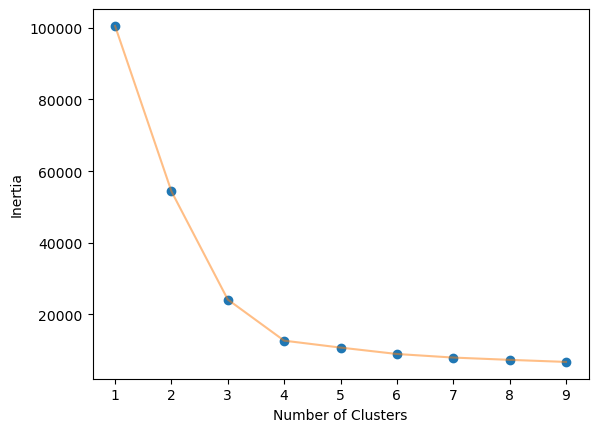

In [7]:
def elbow_plot(data,clusters):
    inertia = []
    for n in range(1, clusters):
        algorithm = KMeans(
            n_clusters=n,
            init="k-means++",
            random_state=125,
        )
        algorithm.fit(data)
        inertia.append(algorithm.inertia_)
    # Plot
    plt.plot(np.arange(1 , clusters) , inertia , 'o')
    plt.plot(np.arange(1 , clusters) , inertia , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
    plt.show();

elbow_plot(cluster_df,10)

We obtained an optimal value of 4. Perfect, thats what we also suggested!

####   Initialize cluster centroids, Assign data points to clusters,  Update cluster centroids, Iteratively Update


In [8]:
n_clusters = 4
epochs = 100


algorithm = KMeans(n_clusters=n_clusters,init="k-means++",max_iter=epochs,random_state=120 )
algorithm.fit(cluster_df)
labels = algorithm.labels_

In [9]:
for k in algorithm.cluster_centers_:
    print(k)#algorithm.cluster_centers_

[4.08395992 4.23678392]
[-6.9494335 -1.9918705]
[-4.89561517  6.93335092]
[ 0.20879334 -0.47995951]


In [10]:
# The number of iterations required to converge
algorithm.n_iter_

7

In [11]:
algorithm.labels_

array([0, 3, 3, ..., 2, 1, 3], dtype=int32)

#### Assign data points to clusters, plot final Result

Text(0.5, 1.0, 'Scikit-Learn K-means Results')

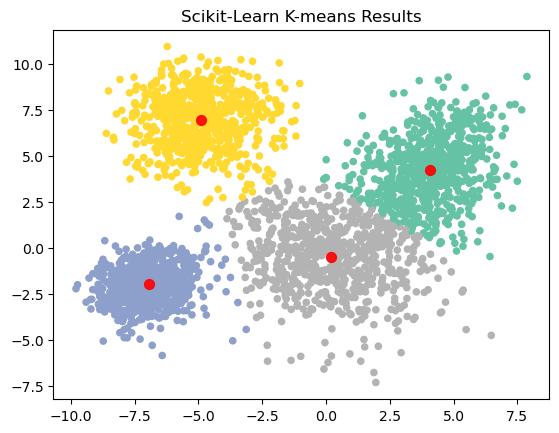

In [12]:
y_kmeans = algorithm.predict(cluster_df)


plt.scatter(cluster_df.iloc[:, 0], cluster_df.iloc[:, 1], c=y_kmeans, s=20, cmap="Set2")

centers = algorithm.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.9);
plt.title("Scikit-Learn K-means Results")

> **Exercise**
>
> Take a look at another data set. 
Visualise the data as a scatterplot. How many cluster centres can be expected? Why does KMeans clustering not work well here? What are the limitations of k-means?


In [13]:

cluster_df = pd.read_csv("data/cluster_sample_data_moons.csv", header=None, sep=" ")
cluster_df.head(3)

,0,1
0,0.890330,0.449208
1,0.927276,0.079686
2,0.176013,0.902117


#### solution

<Axes: xlabel='0', ylabel='1'>

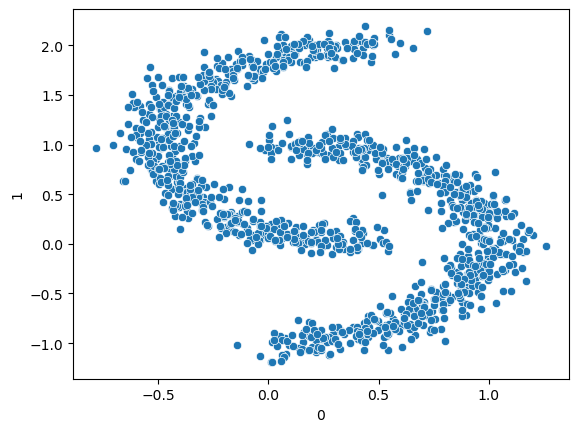

In [14]:

sns.scatterplot(
    data=cluster_df,
    x=0,
    y=1,
)

In [15]:
### normalize


from sklearn import preprocessing

df_norm = preprocessing.normalize(cluster_df)

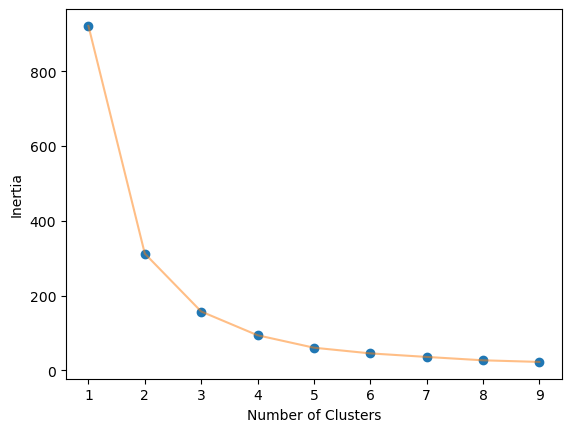

In [16]:
## elbow plot

elbow_plot(df_norm,10)

In [17]:
n_clusters = 2
epochs = 100


algorithm = KMeans(n_clusters=n_clusters,n_init='auto')#, init="k-means++",max_iter=epochs,random_state=120) # init="k-means++"
algorithm.fit(df_norm)
labels = algorithm.labels_

algorithm.n_iter_

5

Text(0.5, 1.0, 'Scikit-Learn K-means Results')

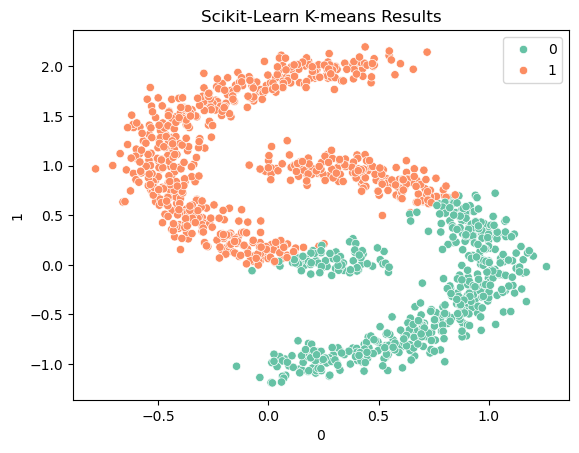

In [18]:
sns.scatterplot(data = cluster_df, x = 0, y = 1, hue = labels, palette="Set2");

plt.title("Scikit-Learn K-means Results")

* KMeans clustering may not work well in this case because the data points in the two clusters are unevenly distributed. KMeans is based on the assumption that the clusters are spherical and of similar size. If this assumption is not met, clustering can produce poor results.

* k-means is limited to linear cluster boundaries


>**Additional Exercise:**
> 
> Research an alternative to k-means that could work here! Can you even implement it with plot?


#### solution


A possible alternative that could work better is the so-called ‘DBSCAN’ (Density-Based Spatial Clustering of Applications with Noise). DBSCAN is based on the density of data points and can identify clusters even if they are not spherical or of similar size.


#### Ressources for this script: 

* [Artley 2022](https://towardsdatascience.com/unsupervised-learning-k-means-clustering-27416b95af27)
* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)
